<a href="https://colab.research.google.com/github/Vsevolod245/ML-Tasks/blob/master/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №5
##Метод Парзена-Розенблатта и оптимизация окна методом leave one out

In [ ]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from sklearn.mixture import GaussianMixture

Распределения

In [ ]:
# Экспоненциальное распределение
def Exponential(lamda):
  return -math.log(1 - random.random())/lamda
def ExponentialData(N):
  x = []
  lamda=1
  for i in range(N):
    x.append(Exponential(lamda))
  return x

# Нормальное распределение
def Normal(M, D):
    n = 12
    x = 0
    for i in range (n):
      x = x + random.random()
    return D * (12/n)**(1/2) * (x - n/2) + M
def NormalData(DataSize, M, D):
    x = []
    for i in range(DataSize):
      x.append(Normal(M, D))
    return x

# Четыре горба
def FourPeaksData(N, m1, d1, m2, d2, m3, d3, m4, d4):
    x = []
    for i in range(N):
      r = random.random()
      if r > 3/4:
        x.append(Normal(m1, d1))
      elif r > 2/4:
        x.append(Normal(m2, d2))
      elif r > 1/4:
        x.append(Normal(m3, d3))
      else:
        x.append(Normal(m4, d4))
    return x

Метод Парзена-Розенблатта


In [ ]:
def PR(x, data, h):
    p = 0
    for i in data:
        p = p + ((2 * math.pi)**(-1/2)) * np.exp(-1/2 * (((x - i)/h)**2))/ (len(data)*h)
    return p

График

In [ ]:
def Plot(DataSize, data):
  plt_min = min(data)
  plt_max = max(data)
  x = np.linspace(plt_min, plt_max, DataSize)
  Points = np.zeros((DataSize))
  # Создание графика
  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(x, PR(x, data, h=1))
  # Вывод графика на экран
  plt.show()

Восстановление плотности

Восстановление плотности экспоненциального распределения с параметром N = 1000


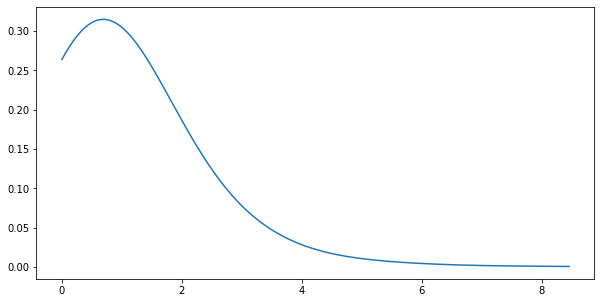

Восстановление плотности нормального распределения с параметрами M = 1, D = 0.1


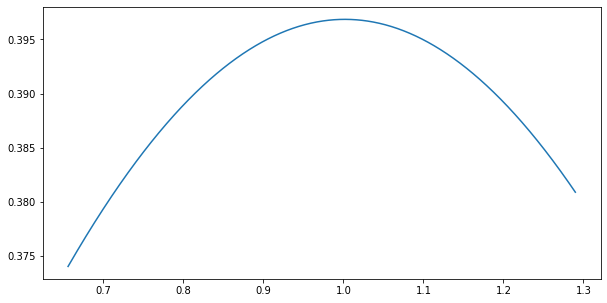

Восстановление плотности распределения "4 горба" с параметрами M1 = -10, D1 = 1, M2 = 5, D2 = 2, M3 = 1, D3 = 6, M4 = 10, D4 = 10


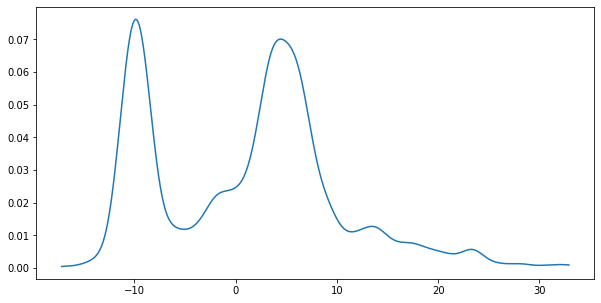

In [ ]:
# Количество точек
DataSize = 1000
# График 1
exp_dat = ExponentialData(DataSize)
print(f'Восстановление плотности экспоненциального распределения с параметром N = {DataSize}')
Plot(DataSize, exp_dat)
# График 2
M=1
D=0.1
nor_dat = NormalData(DataSize, M, D)
print(f'Восстановление плотности нормального распределения с параметрами M = {M}, D = {D}')
Plot(DataSize, nor_dat)
# График 3
M1=-10
D1=1
M2=5
D2=2
M3=1
D3=6
M4=10
D4=10
tp_dat = FourPeaksData(DataSize, M1, D1, M2, D2, M3, D3, M4, D4)
print(f'Восстановление плотности распределения "4 горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}, M3 = {M3}, D3 = {D3}, M4 = {M4}, D4 = {D4}')
Plot(DataSize, tp_dat)

Оптимизация ширины окна методом leave one out

In [ ]:
def LOO(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(PR(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LOO(tp_dat,h) < loo_min:
        loo_min = LOO(exp_dat,h)
        h_min = h

Восстановление плотности распределения "4 горба" с параметрами M1 = -10, D1 = 1, M2 = 5, D2 = 2, M3 = 1, D3 = 6, M4 = 10, D4 = 10


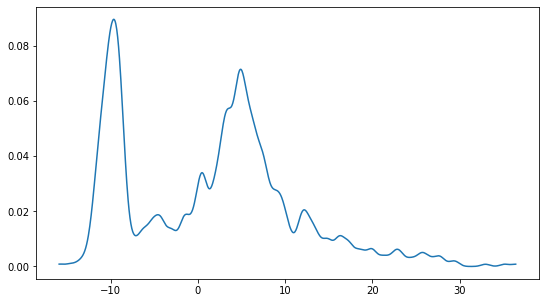

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
plt_min = min(tp_dat)
plt_max = max(tp_dat)
x = np.linspace(plt_min, plt_max, DataSize)
ax.plot(x, PR(x, tp_dat, h=h_min))
points = np.zeros((1000))
print(f'Восстановление плотности распределения "4 горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}, M3 = {M3}, D3 = {D3}, M4 = {M4}, D4 = {D4}')
plt.show()

Алгоритм из sklearn для сгенерированных данных с двумя и более горбами

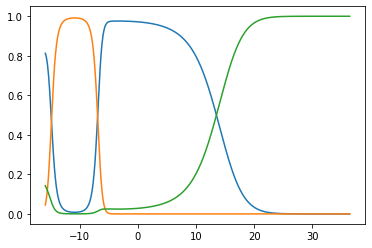

In [ ]:
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=3, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,2])
plt.show()